# Conformer Generation in the Molecule Club

In [14]:
from pathlib import Path

import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdMolAlign
from rdkit.Chem.Draw import IPythonConsole

from molclub.conf_tools import etkdg, conf_utils
from molclub.compute import gfnff, gfnxtb
from molclub import visualize

## Conformer initialization using RDKit's ETKDG

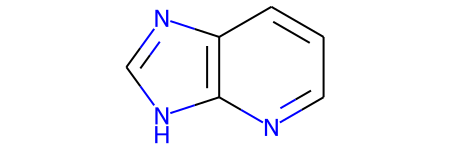

In [2]:
# smi = 'NC(=O)C1=CC=C(CN2N=C3NC(=N)NC(=O)C3=C2NC2=CC=CC=C2)C=C1'
smi = 'N1C=NC2=C1N=CC=C2'
mol = Chem.MolFromSmiles(smi)
mol

there are 1 mols


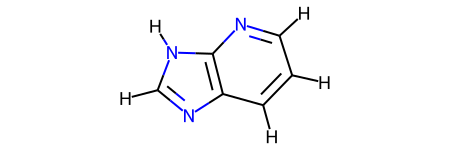

In [3]:
mols = etkdg.generate_conformers(mol, num_confs='auto', num_threads=4)
print(f'there are {len(mols)} mols')
display(mols[0])

## Geometry optimization with xtb's GFNFF

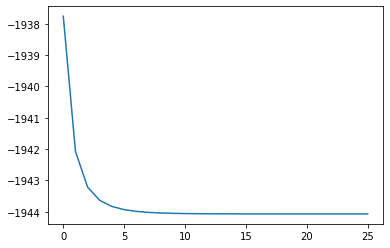

In [4]:
mol = mols[0]
steps, energies = gfnff.opt_traj(mol, 25, 4)

plt.plot(steps, energies)

In [5]:
mols_energies = [gfnff.opt(mol, num_threads=4) for mol in mols]
mols = [m_e[0] for m_e in mols_energies]
energies = [m_e[1] for m_e in mols_energies]

In [6]:
mols, energies = conf_utils.order_confs(mols, None, energies=energies)
energies[:5]

[-1944.0690271288]

In [7]:
print(len(mols))
mols, energies = conf_utils.prune(mols, energies)
print(len(mols))

1
1


# Now again with xtb instead of a force-field

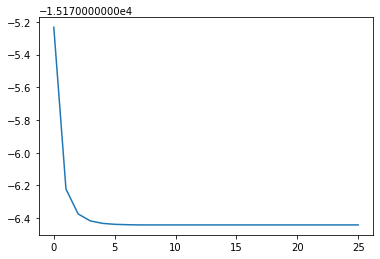

In [8]:
mol = mols[0]
steps, energies = gfnxtb.opt_traj(mol, max_iters=25, num_threads=4)

plt.plot(steps, energies)

In [9]:
mols_energies = [gfnxtb.opt(mol, num_threads=4) for mol in mols]

mols = [m_e[0] for m_e in mols_energies]
energies = [m_e[1] for m_e in mols_energies]

mols, energies = conf_utils.order_confs(mols, None, energies=energies)

In [10]:
print(len(mols))
mols, energies = conf_utils.prune(mols, energies)
print(len(mols))

1
1


In [11]:
boltzmann_pops = conf_utils.boltzmann_pop(energies)
print(boltzmann_pops)
print(len(mols))
mols = mols[:len(boltzmann_pops)]
energies = energies[:len(boltzmann_pops)]
print(len(mols))

[1.0]
1
1


In [12]:
rmsd = conf_utils.align_confs(mols)
print(rmsd)

[0.0]


In [13]:
for mol in mols[1:]:
    visualize.mols([mols[0], mol])

In [20]:
Chem.MolToXYZFile(mol, f'{Path.home()}/azabenzimidazole.xyz')

In [41]:
xyz_blocks = []
with open(Path.home() / 'crest_tmp/azabenzimidazole/tautomers.xyz') as file:
    lines = file.readlines()
    for i in range((len(lines) - 16) // 16):
        i = i * 16
        xyz_blocks.append(lines[i+2:i+16])

len(xyz_blocks)

3

In [42]:
for xyz_block in xyz_blocks:
    temp_mol = Chem.Mol(mol, quickCopy=True)
    temp_mol.AddConformer(conf_utils.conf_from_xyz(xyz_block))
    visualize.mol(temp_mol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol